# MÓDULO 4: LA CIENCIA DE DATOS Y LOS MODELOS DE ANALÍTICA PREDICTIVA EN LA INDUSTRIA 4.0

# 8- Otros métodos de aprendizaje: el kernel trick y aprendizaje por refuerzo

## Mushroom classification: poisonous or not?

En este ejercicio vamos a generar un modelo clasificatorio capaz de predecir si un tipo de seta es venenosa o no. Para ello, vamos a comparar diferentes modelos clasificatorios de aprendizaje supervisado:
- Redes neuronales (MLP)
- Gaussian Naïve Bayes (Gaussian NB)
- Support Vector Machines (SVC)

El ejercicio consiste en utilizar diferentes métodos kernel a la hora de parametrizar el SVC con el objetivo de mejorar los resultados obtenidos previamente.

### Dataset:
[UCI Mushroom Data Set](http://archive.ics.uci.edu/ml/datasets/Mushroom?ref=datanews.io) disponible en `mushrooms.csv`. 

Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s 
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 
4. bruises?: bruises=t,no=f 
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 
6. gill-attachment: attached=a,descending=d,free=f,notched=n 
7. gill-spacing: close=c,crowded=w,distant=d 
8. gill-size: broad=b,narrow=n 
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y 
10. stalk-shape: enlarging=e,tapering=t 
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? 
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s 
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s 
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
16. veil-type: partial=p,universal=u 
17. veil-color: brown=n,orange=o,white=w,yellow=y 
18. ring-number: none=n,one=o,two=t 
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z 
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y 
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

### Importamos los paquetes necesarios y cargamos los datos 

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

df = pd.read_csv('mushrooms.csv')
print(df.shape)
df.head()

(8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Data preprocessing
Convertimos variables categóricas en numéricas (binarias) con el método 'get_dummies()'

In [2]:
df2 = pd.get_dummies(df)
df2.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


### Data preparation and visualization

Separamos el dataset en datos de entrenamiento y test y visualizamos los datos en 2 dimensiones usando un PCA

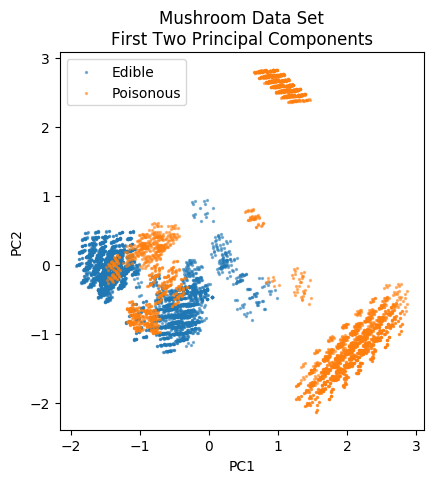

In [3]:
X = df2.iloc[:,2:]
y = df2.iloc[:,1]
pca = PCA(n_components=2).fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(pca, y, random_state=0)
fig=plt.figure(figsize=(9.8,5), dpi=100)
plt.scatter(pca[y.values==0,0], pca[y.values==0,1], alpha=0.5, label='Edible', s=2)
plt.scatter(pca[y.values==1,0], pca[y.values==1,1], alpha=0.5, label='Poisonous', s=2)
plt.legend()
plt.title('Mushroom Data Set\nFirst Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect('equal')
fig.savefig("Principle Component Analysis", format="svg")

Definimos un método para mostrar el decision boundary o frontera de decisión de cada modelo

In [4]:
def plot_mushroom_boundary(X, y, fitted_model):

    plt.figure(figsize=(9.8,5), dpi=100)
    
    mesh_step_size = 0.01  # step size in the mesh
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))
    Z = fitted_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.scatter(X[y.values==0,0], X[y.values==0,1], alpha=0.4, label='Edible', s=5)
    plt.scatter(X[y.values==1,0], X[y.values==1,1], alpha=0.4, label='Posionous', s=5)
    plt.imshow(Z, interpolation='nearest', cmap='RdYlBu_r', alpha=0.15, 
               extent=(x_min, x_max, y_min, y_max), origin='lower')
    plt.title('Decision boundary' + '\n' + 
              str(fitted_model).split('(')[0]+ ' Test Accuracy: ' + str(np.round(fitted_model.score(X, y), 5)))
    plt.gca().set_aspect('equal');
        
    plt.tight_layout()
    plt.subplots_adjust(top=0.9, bottom=0.08, wspace=0.02)

### Model learning

#### Aplicamos el algoritmo Gaussian NB

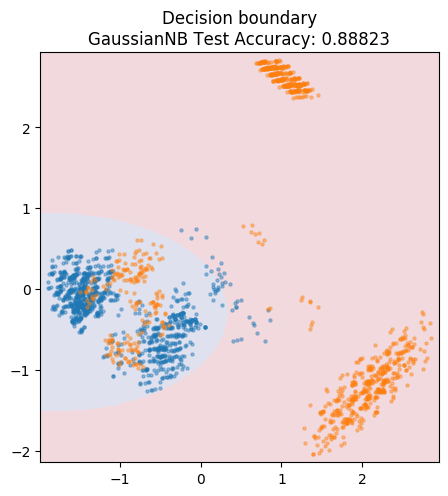

In [5]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

#### Aplicamos el algoritmo MLP

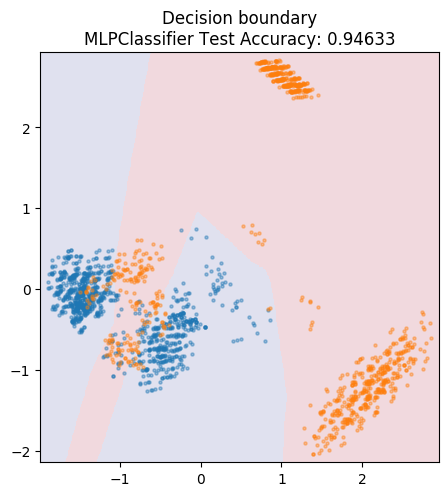

In [6]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier()
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

# EJERCICIO

#### Aplicamos el algoritmo SVC utilizando diferentes métodos kernel:
- lineal (‘linear’)
- polinómico (‘poly’) 
- gaussiano (‘rbf’)

Chequear también diferentes valores de los parámetros C, grado del polinomio ('degree') y $\gamma$ ('gamma') en donde proceda. 

¿Somos capaces de mejorar los resultados obtenidos por los otros algoritmos?

#### Referencias:
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html 
- https://scikit-learn.org/dev/modules/svm.html#svm-kernels

In [ ]:
from sklearn.svm import SVC

model = ...